# Desafío

Ha llegado el momento de que pongas a prueba los conocimientos desarrollados durante la clase. Creamos un gráfico con la función `plt.plot()` para analizar las intrigantes tendencias de inmigración de Colombia a Canadá, desde 1980 hasta 2013. Ahora tenemos una nueva tarea: crear un gráfico de líneas comparando los números de inmigrantes de Brasil y Argentina a Canadá, los dos países más grandes de Sudamérica.

Prepárate para sumergirte en las fascinantes líneas que conectan estos países sudamericanos con el territorio canadiense. En esta misión, la elaboración de este gráfico puede ser útil para comprender las tendencias migratorias de estos países a Canadá a lo largo del tiempo y cómo se comparan entre sí. Al analizar estos factores, podemos obtener una visión más amplia del panorama migratorio en Sudamérica.

¡No te preocupes!

Esta nueva tarea es más desafiante, ya que requiere un análisis comparativo entre dos países. Sin embargo, también te permitirá obtener un aprendizaje enriquecedor. Por lo tanto, explora las diversas posibilidades y recuerda los elementos esenciales de un gráfico: título, etiquetas en los ejes x e y y las marcas del eje x, que deben definirse cada 5 años.

Además, tendrás que descubrir cómo agregar una leyenda para poder identificar la línea de cada país. Siguiendo estas instrucciones, habrás construido un gráfico sólido que te permitirá un análisis significativo y profundo.

Después de crear el gráfico, analiza el resultado obtenido y reflexiona sobre las siguientes preguntas:

- ¿Hay alguna tendencia o patrón común en los datos de ambos países?
- ¿Cuáles son los períodos con mayor número de inmigrantes en ambos países?
- ¿Estás listo para avanzar?

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('data/Inmigrantes_Canadá.csv')
df

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,Asia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Sahara Occidental,África,Norte de África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Asia Occidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [39]:
# Cambiar index
df.set_index("Pais", inplace=True)

In [40]:
# Obteniendo migrantes de argentina y brasil
anos = list(map(str, range(1980,2014)))

chile = df.loc["Chile", anos]
argentina = df.loc["Argentina", anos]
brasil = df.loc["Brasil", anos]

In [41]:
# Crear diccionarios
cl_dict = {'Año': chile.index.tolist(), 'Inmigrantes': chile.values.tolist()}
arg_dict = {"Año": argentina.index.tolist(), "Inmigrantes": argentina.values.tolist()}
br_dict = {"Año": brasil.index.tolist(), "Inmigrantes": brasil.values.tolist()}

In [42]:
# Crear dataframe a partir de diccionarios
datos_cl = pd.DataFrame(cl_dict)
datos_arg = pd.DataFrame(arg_dict)
datos_br = pd.DataFrame(br_dict)

type(datos_br)

pandas.core.frame.DataFrame

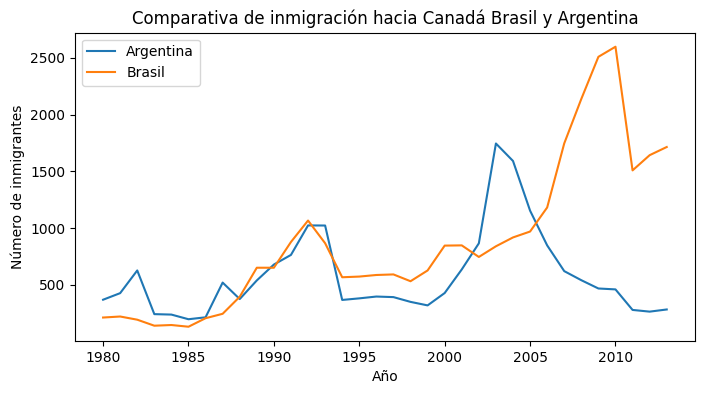

In [43]:
plt.figure(figsize=(8,4))
plt.plot(datos_arg.Año, datos_arg.Inmigrantes)
plt.plot(datos_br.Año, datos_br.Inmigrantes)

plt.xticks(["1980", "1985", "1990", "1995", "2000", "2005", "2010"])

plt.title('Comparativa de inmigración hacia Canadá Brasil y Argentina')

plt.xlabel('Año')
plt.ylabel('Número de inmigrantes')

plt.legend(['Argentina', 'Brasil'])

plt.show()

## Análisis

Se observan tendencias parecidas entre 1980 y 2000:
- Se produjo un aumento en ambos países entre 1985 y 1992, llegando a un número simila poco superior a 1000 inmigraciones
- Ambos países presentaron una baja de migraciones hacia 1995 que luego se mantuvo estable hasta el 2000

Si bien en ambos casos se produce un aumento en las migraciones, en ese punto se produce una diferencia.
- Peak de migraciones argentinas hacia el año 2003-2004, llegando casi a las 2000
- Desde ese mismo año se produce una baja pronunciada hasta el fin de la muestra, quedando por debajo de las 500 migraciones

En el caso de Brasil:
- Se produce un peak de migraciones hacia el año 2010, superando las 2500 migraciones. Se produce una baja hasta el año 2011 y luego un pequeño aumento.

# Versión profesor
*Agregué a Chile para visualizar mayores diferencias*

In [44]:
dif_migracion = datos_br.Inmigrantes - datos_arg.Inmigrantes

Para tener una línea individual para cada país

In [55]:
df_comparacion = df.loc[['Brasil', 'Argentina', 'Chile'], anos]

In [56]:
df_comparacion.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Chile,1233,1069,1078,781,681,533,633,1454,990,1023,...,383,384,427,530,350,375,340,174,291,273


In [57]:
# Hacer una transposición para intercambiar las filas por las columnas y vice versa
df_comparacion = df_comparacion.T

In [58]:
df_comparacion.head()

Pais,Brasil,Argentina,Chile
1980,211,368,1233
1981,220,426,1069
1982,192,626,1078
1983,139,241,781
1984,145,237,681


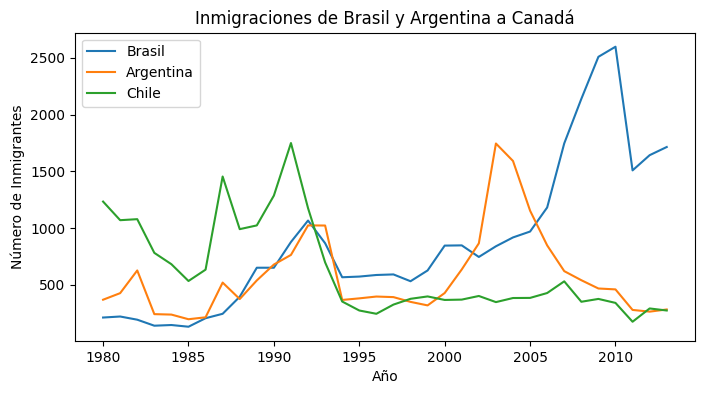

In [59]:
plt.figure(figsize=(8,4))
plt.plot(df_comparacion['Brasil'], label='Brasil')
plt.plot(df_comparacion["Argentina"], label='Argentina')
plt.plot(df_comparacion["Chile"], label='Chile')
plt.title('Inmigraciones de Brasil y Argentina a Canadá')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')

plt.xticks(["1980", "1985", "1990", "1995", "2000", "2005", "2010"])
plt.legend()

plt.show()